##**Day 02 - Exploratory Data Analysis Of Used Cars Dataset**

**Welcome to Day 2 of learning AI with me 🚀**

Today, I decided to get my hands on a larger dataset. I’m following Hands-On Machine Learning by Aurélien Géron as my main guide. In Chapter 2, Géron works with the California Housing Dataset — but I’ve chosen to explore something a little different: the [Used Cars Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data?resource=download)
 from Kaggle 🚗📊.

The plan: load it, explore it, and start doing some basic EDA (Exploratory Data Analysis). Let’s see what insights used cars can give us about real-world ML applications.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload CSV file manually
uploaded = files.upload()

# Extract filename from uploaded dict
filename = next(iter(uploaded))

# Load dataset
cars = pd.read_csv(filename)

print("Dataset shape:", cars.shape)
cars.head()


In [ ]:
# 2. Basic info
print("Shape of dataset:", cars.shape)
print("\nColumns:\n", cars.columns.tolist())
print("\nMissing values:\n", cars.isnull().sum())
print("\nDuplicate rows:", cars.duplicated().sum())
print("\nSummary statistics:\n", cars.describe(include="all"))

Shape of dataset: (426880, 26)

columns:
 ['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']

 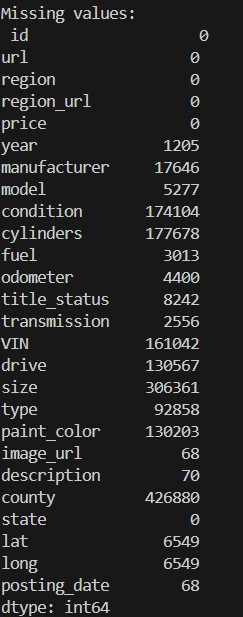

 Duplicate rows: 0

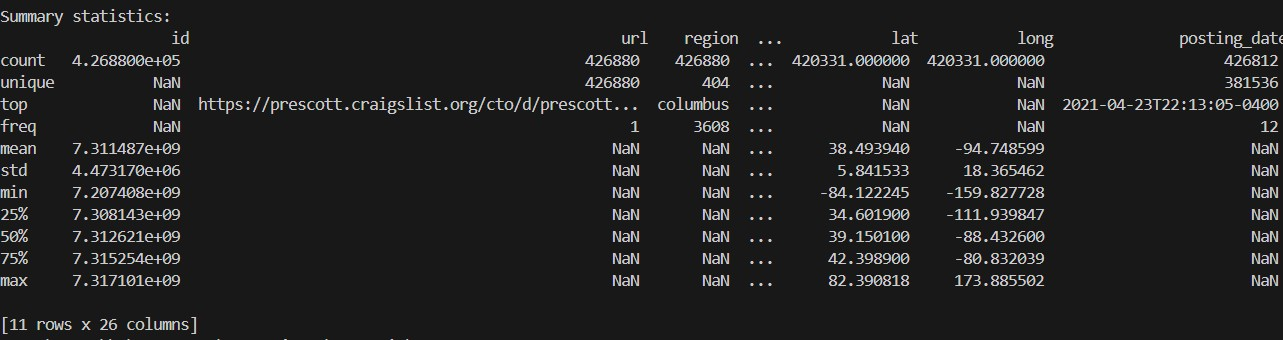


**🎯 First Impressions**

The dataset is messy (missing values everywhere!) but that's what makes it exciting.  
Instead of a clean, academic dataset, this one looks like the **real world**.  

💡 This is exactly the kind of data that forces us to **think, clean, and sharpen our ML skills**.  
By tackling this, I'm training myself to handle messy datasets in real projects.

Next surprise?  
👉 **Outliers!**  
This dataset is full of them — and discovering them is half the fun.


In [ ]:
# 3. Distribution of numeric features
numeric_cols = ["price", "year", "odometer"]
for col in numeric_cols:
    if col in cars.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(cars[col], kde=True, bins=50)
        plt.title(f"Distribution of {col} (Raw Data)")
        plt.show()

### 🔹 Step 3: Distribution of Numeric Features  

In this step, I explored the distribution of key numeric columns: **`price`**, **`year`**, and **`odometer`**.  

- **Price**: The plot revealed a heavy right-skew. Most cars were listed between **$1,000  and  $30,000**, but there were extreme outliers like **$0 listings** (errors/free cars) and absurd prices in the **millions**.  

- **Year**: The majority of cars were from **2000–2020**, which makes sense for used cars. However, I also noticed unrealistic years (e.g., **1800s or 2025+**) which are clearly bad entries.  

- **Odometer**: The odometer readings mostly clustered under **200,000 miles**, with common resale points around **100k miles**. But there were also strange values like **0 miles** (likely typos or new cars listed as used) and some ridiculously high readings in the millions.  

📌 **Takeaway:** These visualizations confirmed that the dataset contains valuable patterns but also **lots of noise and outliers**. Cleaning this data will be crucial before applying machine learning models, and it’s a perfect challenge for sharpening my skills.  


In [ ]:
# 4. Boxplots (check outliers in raw data)
for col in numeric_cols:
    if col in cars.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=cars[col])
        plt.title(f"Boxplot of {col} (Raw Data)")
        plt.show()

### 🔹 Step 4: Boxplots — Outlier Detection  

To dig deeper into the numeric columns, I used **boxplots** for `price`, `year`, and `odometer`. Boxplots are powerful because they highlight the **median, quartiles, and outliers** very clearly.  

- **Price**: The boxplot confirmed what we saw earlier — most values are tightly packed under **$30,000**, but there are *tons of extreme outliers* far above that range. This strongly suggests incorrect entries or rare luxury car listings.  

- **Year**: The plot showed the bulk of cars between **2000–2020**, but it also flagged **unrealistic years** as outliers (such as cars from before 1950 or futuristic years).  

- **Odometer**: Most odometer readings were under **200,000 miles**, yet the boxplot exposed **huge outliers**, including impossible values in the millions.  

📌 **Takeaway:** Boxplots made the **outlier problem crystal clear**. These extreme values could heavily distort any machine learning model, so they must be **handled carefully** (e.g., removal, capping, or transformation) during data cleaning.  


In [ ]:
# 5. Categorical feature counts
categorical_cols = ["manufacturer", "condition", "fuel", "title_status", "transmission", "drive", "type", "paint_color", "state"]
for col in categorical_cols:
    if col in cars.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(data=cars, x=col, order=cars[col].value_counts().index[:15])  # top 15 categories
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col} (Raw Data)")
        plt.show()


### 🔹 Step 5: Categorical Feature Counts  

After analyzing numeric features, I shifted focus to the **categorical variables** like `manufacturer`, `condition`, `fuel`, `title_status`, `transmission`, `drive`, `type`, `paint_color`, and `state`.  

For each feature, I plotted a **countplot** (frequency bar chart) to visualize the distribution of categories. This helps answer questions like:  
- Which manufacturers dominate the dataset?  
- How are conditions (e.g., *new*, *like new*, *fair*) distributed?  
- What is the most common fuel type?  
- Are there certain states or regions that contribute more listings?  

📊 **Key Insights from Countplots:**  
- **Manufacturer**: A handful of brands (like Ford, Chevrolet, Toyota, Honda) dominate the dataset, while many smaller brands appear rarely.  
- **Condition**: The dataset is skewed toward used cars (*good*, *fair*, *like new*), with very few *new* cars.  
- **Fuel**: Gasoline is by far the most common, but there are smaller counts of diesel, hybrid, and electric cars.  
- **Transmission**: Automatic dominates, with manual being much less frequent.  
- **Drive**: Features like *4WD* and *FWD* are common, but *RWD* appears less often.  
- **Paint Color**: Black, white, silver, and gray dominate, while unique colors are rare.  
- **State**: Listings are uneven across states, with a few states contributing a large portion of the data.  

📌 **Takeaway:** These categorical plots reveal **imbalance in classes** — an important factor for machine learning, since models may overfit to the majority categories. Later, techniques like **resampling, encoding, or grouping rare categories** will be necessary.  


In [ ]:
# 6. Correlation heatmap
numeric_avail = [col for col in numeric_cols if col in cars.columns]
if len(numeric_avail) > 1:
    plt.figure(figsize=(10,6))
    corr = cars[numeric_avail].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap (Raw Data)")
    plt.show()

### 🔹 Step 6: Correlation Heatmap  

After analyzing numeric distributions and categorical counts, I examined how the numeric features relate to each other using a **correlation heatmap**.  

- **What is correlation?**  
  Correlation measures the strength and direction of a linear relationship between two variables:  
  - Values close to **+1** → strong positive relationship (as one increases, the other also increases).  
  - Values close to **-1** → strong negative relationship (as one increases, the other decreases).  
  - Values near **0** → little to no linear relationship.  

📊 **Purpose of the Heatmap:**  
- Identify **highly correlated pairs** (e.g., `odometer` vs. `price`).  
- Spot **redundant features** that might carry overlapping information.  
- Detect **unexpected patterns** or data issues (e.g., if two variables that shouldn’t be related are highly correlated).  

📌 **Takeaway:**  
The heatmap provides a quick overview of how features interact. Features with very high correlation may need to be handled carefully during modeling (to avoid **multicollinearity**). Meanwhile, weakly correlated features might still add value if the model can capture **non-linear relationships**.  


In [ ]:
# 7. Raw price relationships
if "odometer" in cars.columns and "price" in cars.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=cars, x="odometer", y="price", alpha=0.3)
    plt.title("Price vs Odometer (Raw Data)")
    plt.show()

if "fuel" in cars.columns and "price" in cars.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=cars, x="fuel", y="price")
    plt.title("Price vs Fuel Type (Raw Data)")
    plt.xticks(rotation=45)
    plt.show()

if "condition" in cars.columns and "price" in cars.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=cars, x="condition", y="price")
    plt.title("Price vs Condition (Raw Data)")
    plt.xticks(rotation=45)
    plt.show()

### 🔹 Step 7: Raw Price Relationships  

Now I started exploring how the target variable (`price`) relates to other features. This helps identify **potential predictors** for modeling.  

#### 1. Price vs. Odometer  
- A scatterplot shows how mileage (odometer) impacts price.  
- Typically, we expect a **negative relationship**: higher mileage → lower price.  
- Outliers (e.g., cars with very high price but high mileage) might indicate rare models, data entry errors, or collector cars.  

#### 2. Price vs. Fuel Type  
- A boxplot compares price distributions across different fuel categories (gas, diesel, hybrid, electric, etc.).  
- This highlights whether certain fuel types (e.g., electric cars) tend to sell at higher or lower prices.  

#### 3. Price vs. Condition  
- A boxplot shows how price varies by the reported vehicle condition (new, like new, excellent, good, fair, salvage).  
- As expected, better condition generally aligns with higher price.  
- This also helps check if the **condition feature is reliable** (e.g., if “salvage” cars are priced higher than “fair,” that’s suspicious).  

📌 **Takeaway:**  
Studying price relationships early gives insights into which features have **strong predictive power** and where the dataset may have **noise or anomalies**. These patterns will be refined further after cleaning and preprocessing.  


## ✅ Day 2 Takeaways  

Day 2 was all about **exploring the raw data** before any cleaning or preprocessing.  
Here’s what I accomplished today:  

- ✅ Looked at **basic info & missing values** (data completeness check).  
- ✅ Explored **distributions** of numerical & categorical features.  
- ✅ Detected **outliers** using boxplots.  
- ✅ Examined **correlations** between numeric features.  
- ✅ Investigated **relationships between price** and important features (odometer, fuel type, condition).  

📌 **Key Insights so far:**  
- Some columns have outliers and inconsistencies (to be handled later).  
- Strong signals exist: e.g., price generally decreases with odometer and improves with better condition.  
- Fuel type and other categorical features may play a big role in predicting price.  

Overall, I now have a solid intuition of the dataset’s structure, quality, and early patterns.  

---

## 🎬 Day 3 Trailer  

Tomorrow (Day 3) will focus on **data cleaning and preprocessing** to prepare the dataset for modeling:  

1. **Handle Missing Data** – drop or impute where necessary.  
2. **Remove or Treat Outliers** – ensure they don’t distort the model.  
3. **Fix Data Types** – convert columns (e.g., categorical vs. numeric).  
4. **Feature Engineering** – create meaningful new variables if useful.  
5. **Encoding & Scaling** – prepare categorical and numeric features for ML models.  

👉 After Day 3, the dataset will be **clean, consistent, and ML-ready**.  
